In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

import plotly.graph_objects as go


#Analyzing the climate dataset provided
 Weather is an important factor to consider when deciding where you want to live, since it can have a large impact on people’s wellbeing. In this assignment, you will explore a data set of average monthly climate measurements for six major cities in the USA. The dataset consists of following columns:
   1.city: The name of the city
   2.lon: The longitude of the city
   3.lat: The latitude of the city
   4.month: The measured month, as a string (‘Jan’, ‘Feb’, etc.)
   5.monthnum: The measured month, as a zero-based integer (0, 1, etc.)
   6.sunshine: The hours of sunshine per month, averaged over the years 1981 - 2010


In [ ]:
df = pd.read_csv('/content/climate.csv')
print(df.head())

      city        lon        lat month  monthnum  sunshine
0  Chicago -87.623177  41.881832   Jan         0       135
1  Chicago -87.623177  41.881832   Feb         1       136
2  Chicago -87.623177  41.881832   Mar         2       187
3  Chicago -87.623177  41.881832   Apr         3       215
4  Chicago -87.623177  41.881832   May         4       281


# Sorted the dataframe by month numbers

In [ ]:
df.sort_values(by='monthnum',inplace=True)
print(df.head())

        city         lon        lat month  monthnum  sunshine
0    Chicago  -87.623177  41.881832   Jan         0       135
36  New York  -73.935242  40.730610   Jan         0       154
12   Houston  -95.358421  29.749907   Jan         0       144
24     Miami  -80.191788  25.761681   Jan         0       222
60   Seattle -122.335167  47.608013   Jan         0        69


# This will give the description of the dataset

In [ ]:
df.describe()

,lon,lat,monthnum,sunshine
count,72.000000,72.000000,72.000000,72.000000
mean,-96.981757,37.244306,5.500000,219.861111
std,19.258907,7.460586,3.476278,65.514928
min,-122.446747,25.761681,0.000000,52.000000
25%,-122.335167,29.749907,2.750000,176.250000
50%,-91.490799,39.232202,5.500000,224.000000
75%,-80.191788,41.881832,8.250000,271.250000
max,-73.935242,47.608013,11.000000,330.000000


#This is will give the info about the datatypes of columns in the  dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      72 non-null     object 
 1   lon       72 non-null     float64
 2   lat       72 non-null     float64
 3   month     72 non-null     object 
 4   monthnum  72 non-null     int64  
 5   sunshine  72 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 3.9+ KB


# Finding out the min sunshine range for each city in USA

In [ ]:
city_min_range = df.groupby('city')['sunshine'].min()
city_min_range

,sunshine
city,
Chicago,106
Houston,141
Miami,209
New York,154
San Francisco,156
Seattle,52


# Finding out the Max sunshine range for each city in USA

In [ ]:

city_max_range = df.groupby('city')['sunshine'].max()
city_max_range

,sunshine
city,
Chicago,318
Houston,298
Miami,280
New York,302
San Francisco,330
Seattle,312


In [ ]:
city_avg = df.groupby('city')['sunshine'].mean()
city_avg

,sunshine
city,
Chicago,208.666667
Houston,219.416667
Miami,241.916667
New York,223.083333
San Francisco,245.833333
Seattle,180.250000


In [ ]:
city_max_1 = np.floor(city_max_range / max(city_max_range)*100)
print(city_max_1)

city
Chicago           96.0
Houston           90.0
Miami             84.0
New York          91.0
San Francisco    100.0
Seattle           94.0
Name: sunshine, dtype: float64


In [ ]:
df.sort_values(by=['city','sunshine'],inplace=True)
df.head()

,city,lon,lat,month,monthnum,sunshine
11,Chicago,-87.623177,41.881832,Dec,11,106
10,Chicago,-87.623177,41.881832,Nov,10,113
0,Chicago,-87.623177,41.881832,Jan,0,135
1,Chicago,-87.623177,41.881832,Feb,1,136
2,Chicago,-87.623177,41.881832,Mar,2,187


The first question after seeing the above dataset is

1. How are average monthly sunshine hours distributed geographically across US cities?

The below map plotted shows the geographical locations of the cities on a map of the United States, with colors representing average monthly sunshine hours. The color gradient provides a quick visual reference for comparing sunshine levels between cities. This visualization is useful for understanding how sunshine varies across different regions in a more intuitive geographic context.

The map provides a clear geographical distribution of sunshine hours, with color gradients indicating variations.
The map highlights that cities in the southern and western parts of the US generally have more monthly sunshine compared to northern cities like Seattle.
Insight into Climate Zones: This visualization helps identify climate zones with varying sunshine levels across the US.

In [ ]:



# Calculate max sunshine hours
average_sunshine = df.groupby('city')['sunshine'].mean().reset_index()

# Get city coordinates
city_coords = df[['city', 'lon', 'lat']].drop_duplicates()
city_data = pd.merge(city_coords, average_sunshine, on='city')

# Create the scatter plot
fig = go.Figure()

fig.add_trace(go.Scattergeo(
    lon=city_data['lon'],
    lat=city_data['lat'],
    text=city_data['city'] + ': ' + city_data['sunshine'].round(1).astype(str) + ' hours',
    mode='markers+text',
    marker=dict(
        size=10,
        color=city_data['sunshine'],
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title='Sunshine Hours')
    ),
    textposition="top center"
))

fig.update_geos(
    scope='usa',
    projection_type='albers usa'
)

fig.update_layout(
    title='Avg Monthly Sunshine Hours in US Cities',
    geo=dict(
        showland=True,
        landcolor="rgb(217, 217, 217)"
    )
)

fig.show()

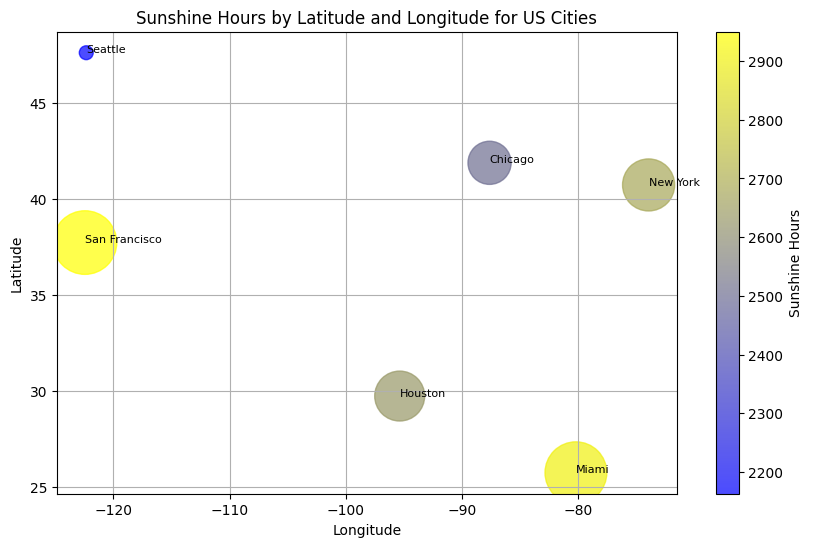

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Calculate total annual sunshine hours for each city
annual_sunshine = df.groupby('city')['sunshine'].sum().reset_index()

# Merge with coordinates
city_coords = df[['city', 'lon', 'lat']].drop_duplicates()
city_data = pd.merge(city_coords, annual_sunshine, on='city')

# Normalize sunshine for size scaling
size_scale = (city_data['sunshine'] - city_data['sunshine'].min()) / (city_data['sunshine'].max() - city_data['sunshine'].min()) * 2000 + 100

cmap = LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'yellow'])

# Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    city_data['lon'], city_data['lat'],
    c=city_data['sunshine'], cmap=cmap,
    s=size_scale, alpha=0.7
)

# Add city labels
for i, row in city_data.iterrows():
    plt.annotate(row['city'], (row['lon'], row['lat']), fontsize=8, ha='left')

# Add color bar
plt.colorbar(scatter, label='Sunshine Hours')

plt.title('Sunshine Hours by Latitude and Longitude for US Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Summarizing based on the above 2 plots

Overall, both the plots provide insights into how geography influences sunshine distribution, highlighting both latitudinal and regional climatic effects.

The next question that also I framed was
3. Which city shows the peak sunshine hours ?
The plot below shows the peak sunshine hours for each city, highlighting the month with the highest sunshine.
The plot allows you to easily compare which cities have the highest peak sunshine and identify their peak months. For example, San Francisco might have its peak in June, while Miami peaks in May.
This visualization provides a clear summary of the maximum sunshine levels each city experiences throughout the year.


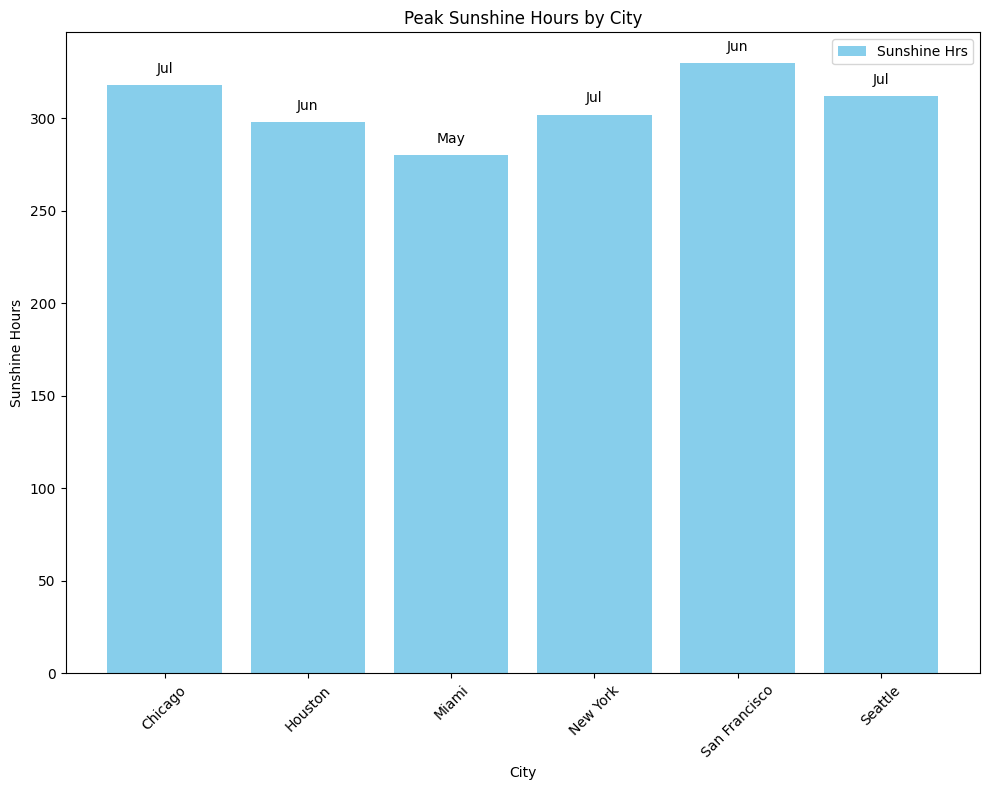

In [ ]:

# Find peak sunshine month for each city
peak_months = df.loc[df.groupby('city')['sunshine'].idxmax()]

# Plot
plt.figure(figsize=(10, 8))
plt.bar(peak_months['city'], peak_months['sunshine'], color='skyblue',label='Sunshine Hrs')
plt.title('Peak Sunshine Hours by City')
plt.xlabel('City')
plt.legend()
plt.ylabel('Sunshine Hours')

for index, row in peak_months.iterrows():
    plt.text(row['city'], row['sunshine'] + 5, row['month'], ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The questions that this below plot shows:
4. How is the Spread or range of sunshine hours by city?

The box plot visualizes the distribution of sunshine hours for each city, highlighting the minimum, first quartile, median, third quartile, and maximum values.
You can see the spread of sunshine hours for each city. Cities with larger boxes have more variability in their monthly sunshine hours.
Easily compare the central tendency and spread of sunshine hours between different cities. For example, Miami might show higher median sunshine hours compared to Seattle.
Any points outside the whiskers indicate outliers in the dataset.

<Figure size 1000x600 with 0 Axes>

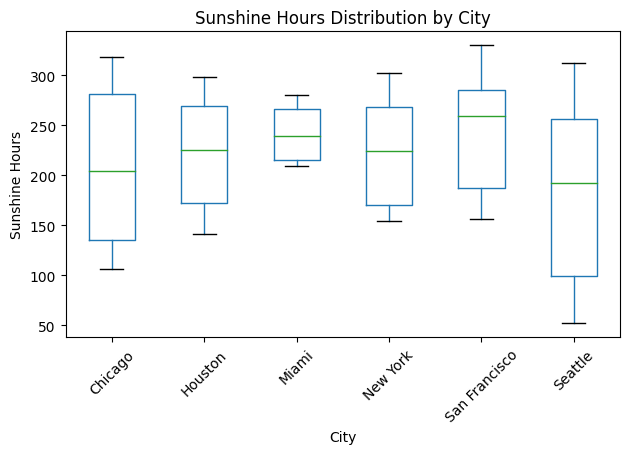

In [ ]:

# Create a box plot for sunshine hours by city
plt.figure(figsize=(10, 6))
df.boxplot(column='sunshine', by='city', grid=False)
plt.title('Sunshine Hours Distribution by City')
plt.suptitle('')
plt.xlabel('City')
plt.ylabel('Sunshine Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The next question that comes to my mind after looking at the dataset is
5. Plotting the Sunshine Hours Monthly for each City in US and how does it look?

The line plot shows how sunshine hours fluctuate throughout the year for each city.
Miami shows relatively stable sunshine hours year-round.
Seattle experiences significant variation, with low sunshine in winter and peaks in summer.
The plot allows for easy comparison between cities, highlighting differences in seasonal patterns. For instance, San Francisco and Miami have more consistent sunshine, while Chicago and Seattle show more fluctuation. The heatmap provides a visual representation of sunshine hours across cities and months using color intensity.
Darker colors indicate fewer sunshine hours, while lighter colors indicate more.

The heatmap quickly highlights months with high or low sunshine for each city. For example, Miami consistently shows lighter shades, indicating higher sunshine hours.
It helps identify anomalies such as unusually low sunshine in typically sunnier months or vice versa.
The line plot provides detailed trends over time for individual cities, allowing for precise comparisons of seasonal changes.
The heatmap offers an immediate visual overview of patterns and anomalies across all cities and months, making it easy to spot general trends at a glance.

Together, these plots complement each other by providing both detailed and high-level views of sunshine distribution across different cities and times of the year.


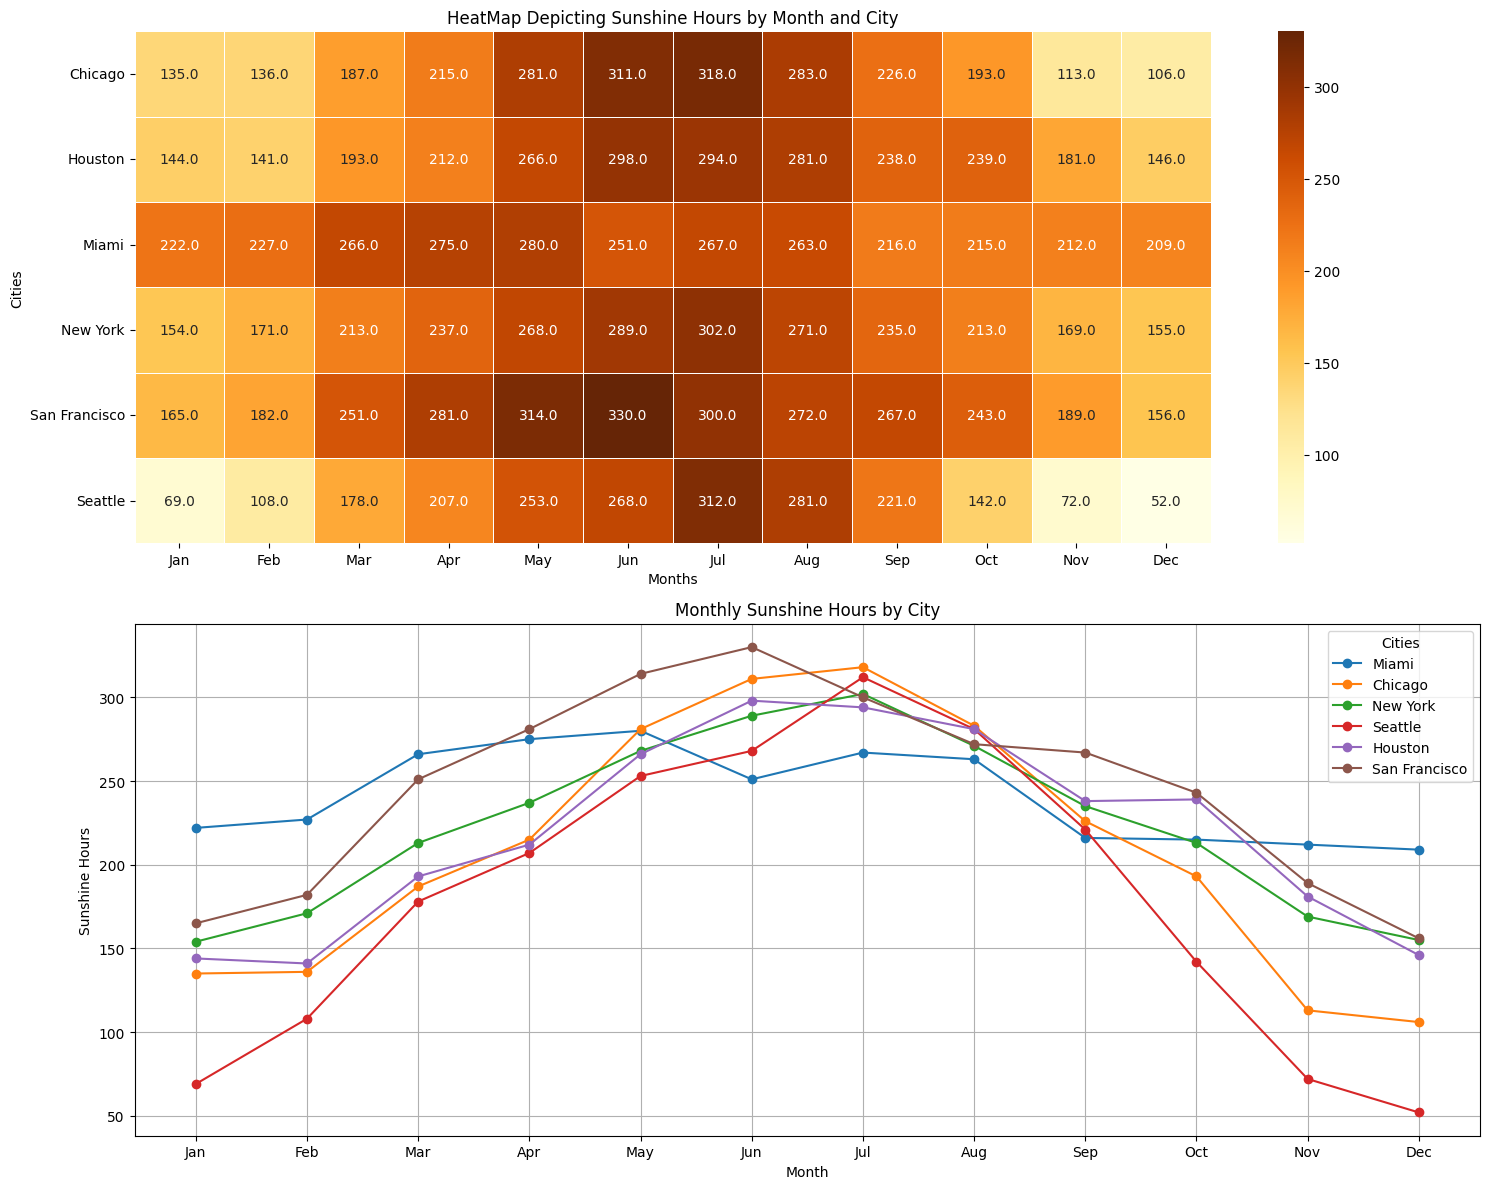

In [ ]:




# Sort the DataFrame
df.sort_values(by='monthnum', inplace=True)

# Pivot the DataFrame for the heatmap
df_pivot = df.pivot(index='city', columns='monthnum', values='sunshine')

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Heatmap
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(df_pivot, annot=True, fmt=".1f", cmap=cmap, cbar=True, linewidths=0.5, ax=ax1)
ax1.set_xlabel('Months')
ax1.set_ylabel('Cities')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax1.set_xticklabels(months, ha='center')
ax1.set_title('HeatMap Depicting Sunshine Hours by Month and City')

# Line plot
for city in df['city'].unique():
    city_data = df[df['city'] == city]
    ax2.plot(city_data['monthnum'], city_data['sunshine'], marker='o', label=city)

ax2.set_xlabel('Month')
ax2.set_ylabel('Sunshine Hours')
ax2.set_title('Monthly Sunshine Hours by City')
ax2.set_xticks(range(12))
ax2.set_xticklabels(months)
ax2.legend(title='Cities')
ax2.grid(True)

plt.tight_layout()
plt.show()

From the Above Heat map and Line plots, we can draw insights about most of the data:

Miami:Shows constant sunshine hours throughout the year, ranging from 209 to 280 hours per month. This stability is typical of its tropical climate.

Seattle: Displays significant seasonal variation, with very low sunshine in winter (as low as 52 hours in December) and peaks in summer (up to 312 hours in July).

New York: Displays a moderate seasonal changes, with more sunshine in summer months (302 hours in July) and less in winter (154 hours in January).

San Francisco: Its consistent with higher sunshine hours during spring and summer, peaking at 330 hours in June.

Chicago: Displays a clear seasonal pattern, with high sunshine in summer (318 hours in July) and low in winter (106 hours in December).

Houston: Shows a relatively stable pattern with slight increases during summer months, peaking at 298 hours in June.

The YlOrBr color map transitions from light yellow to dark orange-brown:
Light Yellow: Indicates lower sunshine hours.
Dark Orange-Brown: Represents higher sunshine hours.
This color encoding helps quickly identify periods of high and low sunshine across different cities and months.

Based on city wise observation and analysis and the plots shown above
Summer Peaks:
 Most cities see increased sunshine during the summer months June-August, with San Francisco and Seattle showing notable peaks.
Winter Lows:
 Winter months December-February generally have reduced sunshine, particularly noticeable in Seattle and Chicago.
Geographical Influence:
 Southern cities like Miami and Houston have more constant sunshine patterns compared to northern cities like Seattle and Chicago.
Conclusion
The heatmap and line plot visualizations effectively show how geographical location and climate influence sunshine distribution across different cities. The line plot provides detailed trends over time for individual cities, while the heatmap offers an immediate visual overview of patterns across all cities and months.
Together, these plots provide a comprehensive understanding of how sunshine hours vary by month and city, highlighting both high-level patterns and detailed seasonal shifts.